# Some additional built-in Python functions

- if, all, sum, any

In [1]:
def example_if(num):
    if num == 4:
        print("num is 4")
    elif num == 5:
        print("num is 5")
    elif num == 6:
        print("num is 6")
    else:
        print("num is not 4 or 5 or 6")

In [4]:
# multiple statements in one line with ";"
example_if(4); example_if(5); example_if(10)

num is 4
num is 5
num is not 4 or 5 or 6


In [7]:
sum([2.0, 2.0, 3, 0])

7.0

# Introduction to numpy

- Python, no built-in library for:
    - n-dimensional array
    - matrices, vectors
    - linear algebra
    - numerical integration
    - etc.
- Matlab - built-in
- Fortran and C, libraries exist
- numpy: implements these features
- storage of datafiles, row vs column major order


<p><a href="https://commons.wikimedia.org/wiki/File:Row_and_column_major_order.svg#/media/File:Row_and_column_major_order.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/4/4d/Row_and_column_major_order.svg" alt="Row and column major order.svg" height="250" width="200"></a><br>By <a href="//commons.wikimedia.org/wiki/User:Cmglee" title="User:Cmglee">Cmglee</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=65107030">Link</a></p>

# Numpy basics

## Loading packages in Python

In [2]:
import numpy as np

Now all of numpys functionality is available.

## Creating arrays

- from lists, tuples
- using numpy functions (`np.zeros`, `np.ones`, `np.arange`, `np.linspace`, `np.empty`)
- specifying dtype

In [4]:
a = np.array([[1, 2, 3], [4, 5, 6]], order="F")
print(a, "\n\n", a.flatten(order="K"))

[[1 2 3]
 [4 5 6]] 

 [1 4 2 5 3 6]


In [26]:
a.flatten(order="C")

array([1, 2, 3, 4, 5, 6])

In [27]:
a.flatten(order="K")

array([1, 4, 2, 5, 3, 6])

In [24]:
b = np.array(a, order="C")

In [25]:
b.flatten(order="K")

array([1, 2, 3, 4, 5, 6])

## Array attributes

ndim, shape, size, dtype, itemsize, data

In [28]:
a.dtype

dtype('int64')

In [29]:
a.shape

(2, 3)

In [31]:
a.shape[0]

2

In [32]:
a.shape[1]

3

In [39]:
a = np.array([[1, 2, 3], [4, 5, 0]], dtype="uint64")
print(a, "\n\n")

# a[1,2] = a[1,2] - 1
a[1,2] -= 1

a

[[1 2 3]
 [4 5 0]] 




array([[                   1,                    2,                    3],
       [                   4,                    5, 18446744073709551615]],
      dtype=uint64)

In [41]:
a = np.array([[1, 2, 3], [4, 5, 0]], dtype="int64")
print(a, "\n\n")
a[1,2] -= 1
# a[1,2] = a[1,2] - 1
a

[[1 2 3]
 [4 5 0]] 




array([[ 1,  2,  3],
       [ 4,  5, -1]])

In [42]:
a.itemsize * a.size

48

In [43]:
a.size

6

## Basic arithmetic

+, - , \*, \**

In [3]:
b = np.array([ii for ii in range(3)], dtype="float64")
b

array([0., 1., 2.])

In [45]:
np.dot(a, b)

array([8., 3.])

In [48]:
np.dot([1, 2, 3], [1, 2, 3])

14

In [49]:
np.cross([1, 2, 3], [1, 2, 3])

array([0, 0, 0])

In [50]:
a, b

(array([[ 1,  2,  3],
        [ 4,  5, -1]]), array([0., 1., 2.]))

In [5]:
c = a + b
c

array([[1., 3., 5.],
       [4., 6., 8.]])

In [60]:
d = np.array([[1], [2]])
d, d.shape

(array([[1],
        [2]]), (2, 1))

In [61]:
a + d

array([[2, 3, 4],
       [6, 7, 1]])

In [64]:
c

array([[1., 3., 5.],
       [4., 6., 1.]])

In [63]:
c.dtype

dtype('float64')

In [65]:
c[0,:] # in matlab c(1,:)

array([1., 3., 5.])

In [6]:
d = c[:,0]
d

array([1., 4.])

In [7]:
d[0] = 0.0; c

array([[0., 3., 5.],
       [4., 6., 8.]])

In [8]:
d = c[:,0].copy()
c, d

(array([[0., 3., 5.],
        [4., 6., 8.]]), array([0., 4.]))

In [9]:
d[0] = 10.0; c

array([[0., 3., 5.],
       [4., 6., 8.]])

# Manipulating arrays

## Indexing

- basics
- boolean

In [10]:
t = c < 5.0
print(t, t.dtype)

[[ True  True False]
 [ True False False]] bool


In [11]:
t.shape

(2, 3)

In [12]:
c[t]

array([0., 3., 4.])

In [13]:
c[c < 5.0]

array([0., 3., 4.])

In [18]:
c1, c2 = c < 5.0, c > 2.0

In [19]:
print(c1, "\n\n", c1,  "\n\n", c1 & c2, "\n\n", c1 | c2)

[[ True  True False]
 [ True False False]] 

 [[ True  True False]
 [ True False False]] 

 [[False  True False]
 [ True False False]] 

 [[ True  True  True]
 [ True  True  True]]


In [15]:
print(c, "\n\n", c[(c < 5.0) & (c > 2.0)])

[[0. 3. 5.]
 [4. 6. 8.]] 

 [3. 4.]


## Reshaping, views and copies

In [20]:
c

array([[0., 3., 5.],
       [4., 6., 8.]])

In [21]:
np.reshape(c, (3,2))

array([[0., 3.],
       [5., 4.],
       [6., 8.]])

In [30]:
e = c.reshape(6, order="F")
e.shape, e

((6,), array([0., 4., 3., 6., 5., 8.]))

In [27]:
print(e.base, "\n\n", e.base == c, e.base is c)

[[0. 3. 5.]
 [4. 6. 8.]] 

 [[ True  True  True]
 [ True  True  True]] True


In [31]:
np.all(e.base == c)

True

In [33]:
np.all([True, False, True])

False

In [34]:
np.any([True, False])

True

In [35]:
np.all(c > 5.0)

False

In [36]:
np.any(c > 5.0)

True

## Linear algebra

- `np.linalg.solve`

In [38]:
from numpy import linalg as lin, random as rng

In [37]:
lin, rng = np.linalg, np.random

In [46]:
right, left = rng.randn(4, 5) + 1, rng.rand(4)
print(right, "\n\n", left)

[[ 0.07567467  1.46228001  0.90874758 -0.6859641   1.77499068]
 [ 1.1646527   0.4947508   2.14681057 -1.77809245  0.58653392]
 [-0.1762923   4.13648324  0.85474432  1.0200361   2.05414   ]
 [ 1.26403581  0.3281651   0.3017361   1.9736272   0.68657187]] 

 [0.04103071 0.69605684 0.53569235 0.02060393]


In [47]:
help(lin.lstsq)

Help on function lstsq in module numpy.linalg.linalg:

lstsq(a, b, rcond='warn')
    Return the least-squares solution to a linear matrix equation.
    
    Solves the equation `a x = b` by computing a vector `x` that
    minimizes the Euclidean 2-norm `|| b - a x ||^2`.  The equation may
    be under-, well-, or over- determined (i.e., the number of
    linearly independent rows of `a` can be less than, equal to, or
    greater than its number of linearly independent columns).  If `a`
    is square and of full rank, then `x` (but for round-off error) is
    the "exact" solution of the equation.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` columns
        of `b`.
    rcond : float, optional
        Cut-off ratio for small singular values of `a`.
        For the pur

In [61]:
sol, _, _, _ = lin.lstsq(right, left)

/home/istvan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [63]:
sol = lin.lstsq(right, left)[0]

/home/istvan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [64]:
sol

array([ 0.13037003,  0.26148514,  0.2569828 , -0.03633991, -0.34347215])

$\mathrm{RMS}(x) = \sqrt{\left(\sum_i^N x_i^2 \right) N^{-1}}$

In [65]:
def rms(array):
    return np.sqrt(np.sum(array**2) / array.size)

In [69]:
right @ sol

array([0.04103071, 0.69605684, 0.53569235, 0.02060393])

In [70]:
rms(right @ sol - left)

5.478211693464766e-16

$f(x,a) = a_0 + a_1 x^1 + a_2 x^2$

Helper $\LaTeX$ commands:

$\newcommand\parf[1] {
    \frac{\partial f(x_i, A, \lambda, \phi)}{\partial #1}
}$

$\def\argf{\lambda x_i + \phi}$

$\newcommand\parf[1] {
    \frac{\partial f(x_i, A, \lambda, \phi)}{\partial #1}
}$

$\def\argf{\lambda x_i + \phi}$

$f(x_i, A, \lambda, \phi) = A \sin (\argf)$

$D_{i0} = \parf{A} = \sin (\argf)$

$D_{i1} = \parf{\lambda} = A x_i \cos (\argf)$

$D_{i2} = \parf{\phi} = A \sin (\argf)$

# Example usage: Polynom fitting, Introduction to Matplotlib

In [74]:
x = np.linspace(0.0, 10.0, 25)
c = [2.0, 3.5, 0.2]
y = c[0] + c[1] * x + c[2] * x**2
# y = c[0] x**0 + c[1] * x**1 + c[2] * x**2
y_noise = y + rng.rand(y.shape[0])

In [89]:
np.empty((2,4))

array([[6.91994857e-310, 6.91996678e-310, 6.91996525e-310,
        6.91996525e-310],
       [6.91994857e-310, 6.91996676e-310, 6.91996674e-310,
        6.91996680e-310]])

In [90]:
def polyfit(x, y, deg):
    design = np.empty((x.size, deg + 1))
    
    design[:,0] = 1.0
    design[:,1] = x
    
    for ii in range(2, deg + 1):
        design[:,ii] = x**ii
    
    
    return lin.lstsq(design, y)[0]

In [92]:
p = polyfit(x, y, 2)
p, c

/home/istvan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


(array([2. , 3.5, 0.2]), [2.0, 3.5, 0.2])

In [93]:
p = polyfit(x, y_noise, 2)
p, c

/home/istvan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


(array([2.37400136, 3.59767434, 0.18774149]), [2.0, 3.5, 0.2])

In [94]:
# p[0], p[1]
# p[0:2] = p[:2]

p[0:], p[1:], p[:2], p[2:0:-1], p[::-1]

(array([2.37400136, 3.59767434, 0.18774149]),
 array([3.59767434, 0.18774149]),
 array([2.37400136, 3.59767434]),
 array([0.18774149, 3.59767434]),
 array([0.18774149, 3.59767434, 2.37400136]))

In [95]:
yy = np.polyval(p[::-1], x)

In [96]:
rms(yy - y)

0.4621626284749673

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

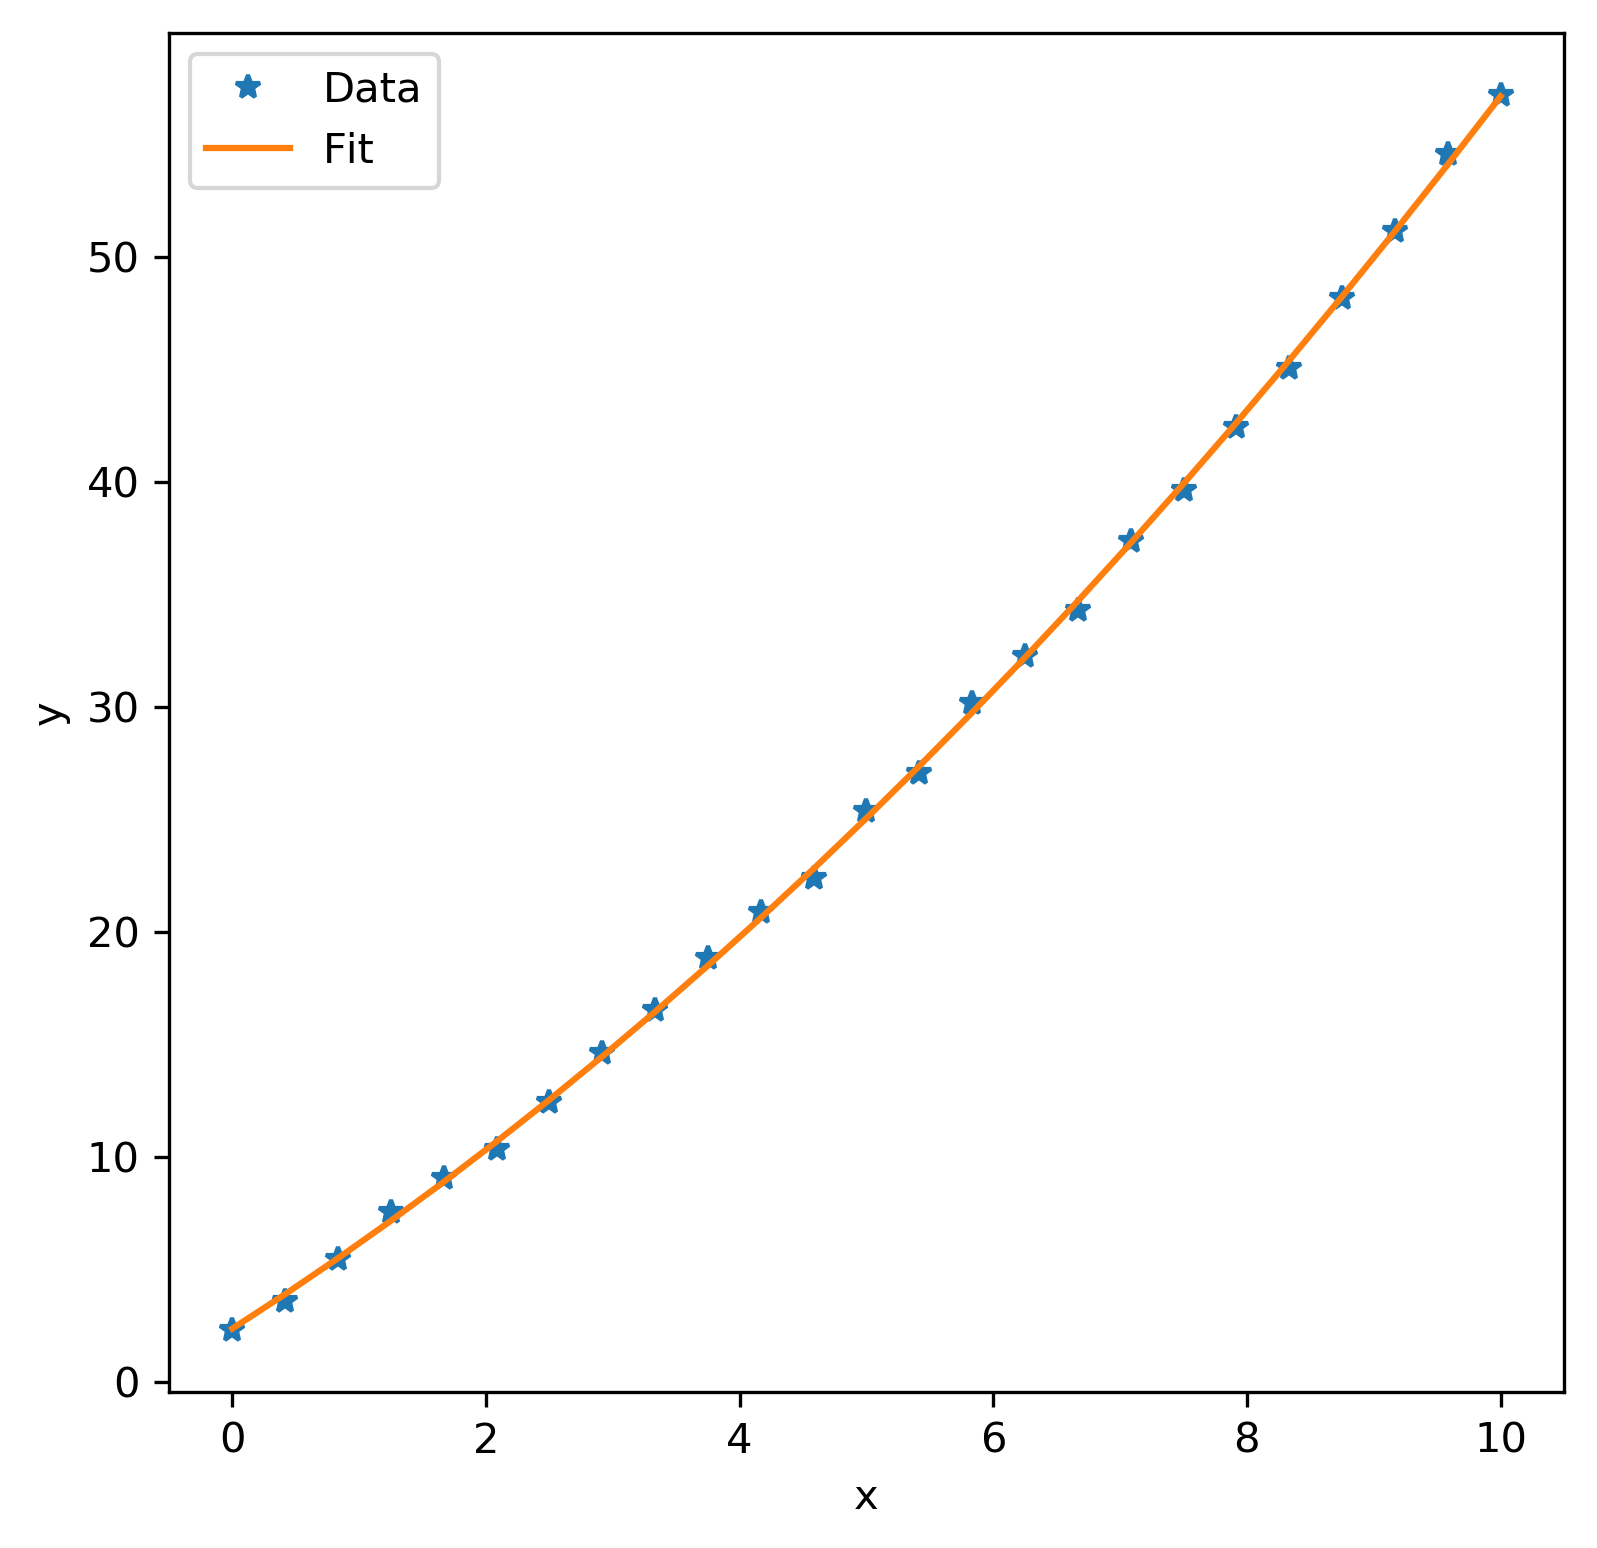

In [101]:
f = plt.figure(figsize=(6, 6), dpi=300)

plt.plot(x, y_noise, "*", label="Data")
plt.plot(x, yy, "-", label="Fit")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

f.savefig("fit.png")

In [99]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure.
    
    Parameters
    ----------
    
    num : integer or string, optional, default: None
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        `num`.
    
    figsize : (float, float), optional, default: None
        width, height in inches. If not provided, defaults to
        :rc:`figure.figsize` = ``[6.4, 4.8]``.
    
    dpi : integer, optional, default: Non

# Numpy FFT

Coming soon